# Challenge: Backtest on Other Datasets

## Download data from `yfinance`

In [1]:
import yfinance as yf

ticker = 'AAPL'
df = yf.download(ticker)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092351,73449600
...,...,...,...,...,...,...
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45326900


## Preprocess the data

### Filter the date range

- Since 1 year ago at least

In [2]:
df = df.loc['2020-01-01':].copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143883,132079200
...,...,...,...,...,...,...
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45326900


### Create the target variable

#### Percentage change

- Percentage change on `Adj Close` for tomorrow

In [3]:
df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df.change_tomorrow

Date
2020-01-02    0.009818
2020-01-03   -0.007905
2020-01-06    0.004725
2020-01-07   -0.015831
2020-01-08   -0.020799
                ...   
2023-05-05    0.000404
2023-05-08    0.010072
2023-05-09   -0.010313
2023-05-10   -0.001094
2023-05-11         NaN
Name: change_tomorrow, Length: 846, dtype: float64

If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [4]:
df['Adj Close']

Date
2020-01-02     73.449394
2020-01-03     72.735306
2020-01-06     73.314888
2020-01-07     72.970078
2020-01-08     74.143883
                 ...    
2023-05-05    173.570007
2023-05-08    173.500000
2023-05-09    171.770004
2023-05-10    173.559998
2023-05-11    173.750000
Name: Adj Close, Length: 846, dtype: float64

We shall multiply by -1:

In [5]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,-0.009818
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800,0.007905
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,-0.004725
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000,0.015831
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143883,132079200,0.020799
...,...,...,...,...,...,...,...
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400,-0.000404
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800,-0.010072
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45326900,0.010313


To better read the data, we shall multiply by 100 to have percentage values:

In [6]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,-0.981763
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800,0.790538
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,-0.472537
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000,1.583145
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143883,132079200,2.079950
...,...,...,...,...,...,...,...
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400,-0.040350
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800,-1.007158
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45326900,1.031340


#### Remove rows with any missing data

In [7]:
df = df.dropna().copy()
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,-0.981763
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800,0.790538
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,-0.472537
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000,1.583145
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143883,132079200,2.079950
...,...,...,...,...,...,...,...
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400,4.482349
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400,-0.040350
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800,-1.007158


#### BONUS: how to interpret the distribution of a continuous variable

Based on the following normal distribution:

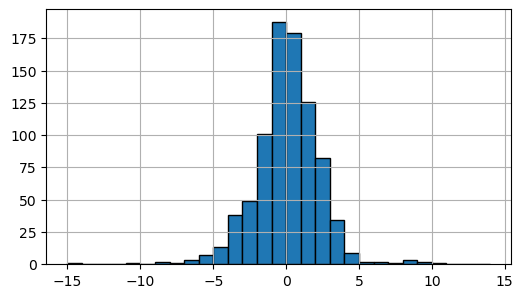

In [8]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black');

And the standard deviation:

In [9]:
df.change_tomorrow.std()

2.254653283068369

We can say that 68% of the changes are between -2.25 and 2.25, approximately.

#### Change sign

Did the stock go up or down?

In [10]:
import numpy as np

In [11]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,-1
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735306,146322800,1
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200,-1
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000,1
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143883,132079200,1
...,...,...,...,...,...,...,...
2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400,1
2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400,-1
2023-05-08,172.479996,173.850006,172.110001,173.500000,173.500000,55962800,-1


## Compute Machine Learning model

Proposal: Random Forest within `ensemble` module of `sklearn` library

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(max_depth=7, random_state=42)

In [14]:
y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [15]:
model.fit(X, y)

RandomForestClassifier(max_depth=7, random_state=42)

In [16]:
model.score(X, y)

0.8201183431952662

## Backtesting

### Create the strategy

In [17]:
from backtesting import Strategy

/Users/sota/miniforge3/envs/backtesting/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [18]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

### Run the Backtest

In [19]:
from backtesting import Backtest

In [20]:
bt = Backtest(
    X, SimpleClassificationUD, cash=10000,
    commission=.002, exclusive_orders=True
)

In [21]:
results = bt.run()

### Show the report in a DataFrame

In [22]:
results.to_frame('Value')

,Value
Start,2020-01-02 00:00:00
End,2023-05-10 00:00:00
Duration,1224 days 00:00:00
Exposure Time [%],99.763314
Equity Final [$],1676271.414631
Equity Peak [$],1729112.680564
Return [%],16662.714146
Buy & Hold Return [%],131.143658
Return (Ann.) [%],360.632696
Volatility (Ann.) [%],151.097038


## Plot the backtest report

> Don't worry about this new tool just yet, we will explain in a future chapter how to interpret the following chart.

In [23]:
bt.plot()

Row(id='1408', ...)

## Continue with the tutorials on the following chapter

[LinkedIn Course Chapter]()